In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
#Read csv  file containing data
delhi = pd.read_csv(r'Delhi.csv')
delhi

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2500000,540,Madhu Vihar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4994,3000000,540,Madhu Vihar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4995,2600000,415,Sector 26 Dwarka,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4996,5500000,415,Sector 26 Dwarka,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [54]:
delhi.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [55]:
#Renaming some columns to shorter names and Dropping unnecessary features
delhi.rename(columns={"No. of Bedrooms":"Bedrooms", "24X7Security":"Security","Children'splayarea":"Playarea", "MaintenanceStaff": "Staff","LiftAvailable": "Lift", 'LandscapedGardens':'Garden', 'MultipurposeRoom':'UtilityRoom'}, inplace=True)
delhi.drop(['Microwave', 'TV', 'WashingMachine', 'Wifi', 'VaastuCompliant', 'SportsFacility', 'JoggingTrack', 'ATM', 'School', 'ClubHouse', 'Cafeteria', 'Hospital', 'GolfCourse', 'Gasconnection', 'AC', 'ShoppingMall'], axis = 1, inplace = True)
delhi.columns

Index(['Price', 'Area', 'Location', 'Bedrooms', 'Resale', 'Staff', 'Gymnasium',
       'SwimmingPool', 'Garden', 'RainWaterHarvesting', 'IndoorGames',
       'Intercom', 'Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'UtilityRoom', 'Playarea', 'Lift', 'BED', 'DiningTable', 'Sofa',
       'Wardrobe', 'Refrigerator'],
      dtype='object')

In [56]:
#Checking for null values
delhi.isnull().sum()

Price                  0
Area                   0
Location               0
Bedrooms               0
Resale                 0
Staff                  0
Gymnasium              0
SwimmingPool           0
Garden                 0
RainWaterHarvesting    0
IndoorGames            0
Intercom               0
Security               0
PowerBackup            0
CarParking             0
StaffQuarter           0
UtilityRoom            0
Playarea               0
Lift                   0
BED                    0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0
dtype: int64

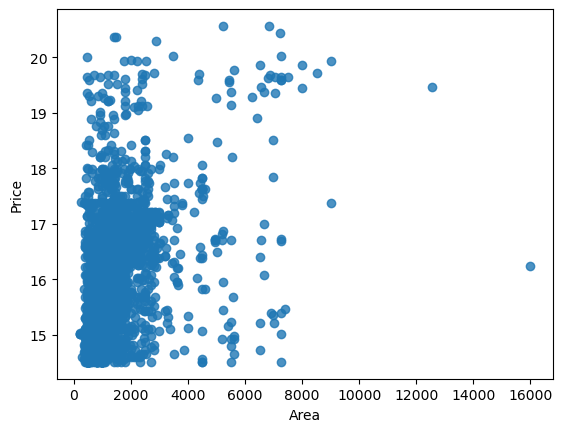

In [57]:
y1=np.log(delhi["Price"])
sns.regplot(x="Area",y=y1,data=delhi,fit_reg=False)
plt.show()

In [58]:
#Making data more balanced by removing records having area more than or equal to 8000
delhi.drop(delhi[delhi["Area"]>=8000].index,inplace=True)

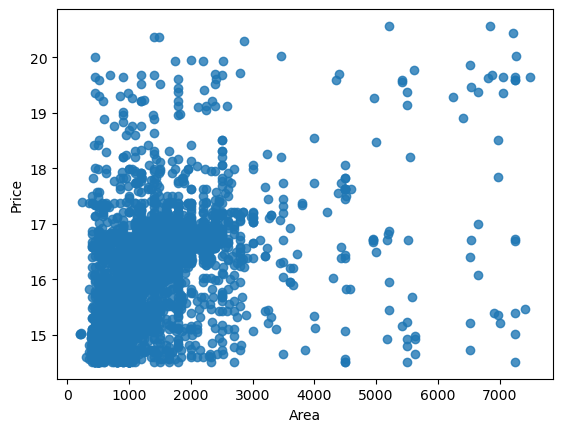

In [59]:
y1=np.log(delhi["Price"])
sns.regplot(x="Area",y=y1,data=delhi,fit_reg=False)
plt.show()

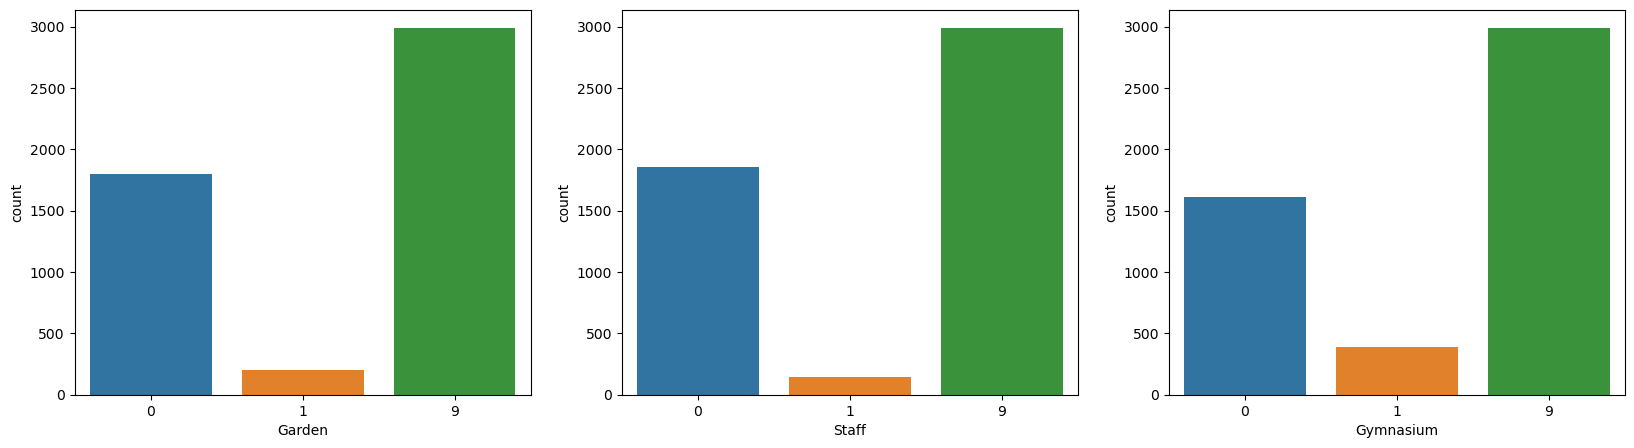

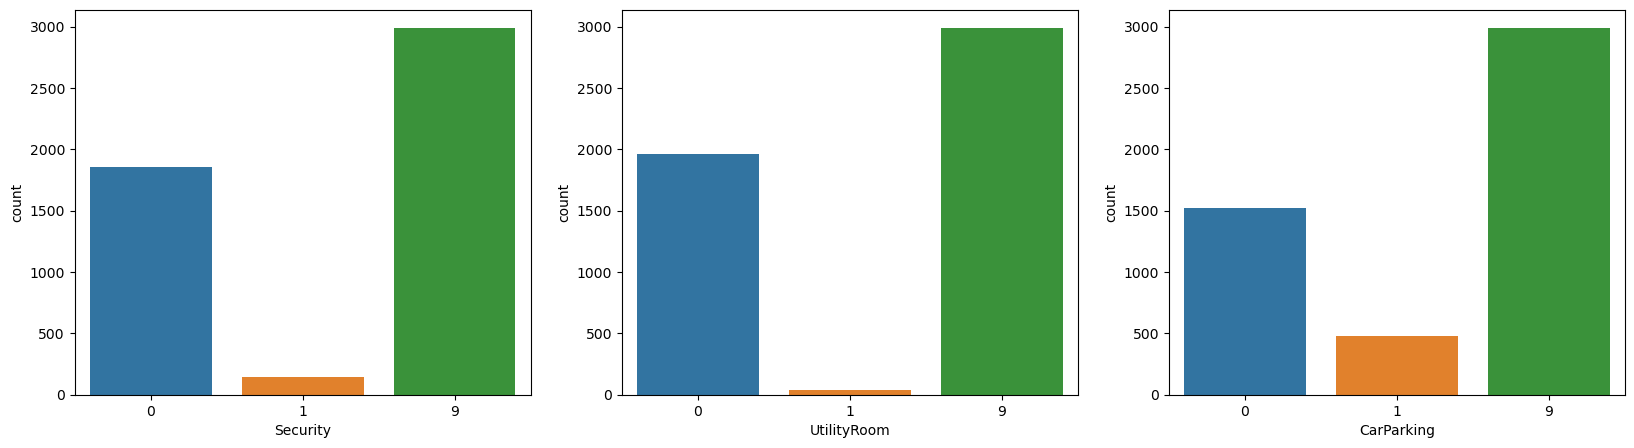

In [60]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.countplot(x=delhi["Garden"], ax = axs[0])
sns.countplot(x=delhi["Staff"], ax = axs[1])
sns.countplot(x=delhi["Gymnasium"], ax = axs[2])
plt.show()
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.countplot(x=delhi["Security"], ax = axs[0])
sns.countplot(x=delhi["UtilityRoom"], ax = axs[1])
sns.countplot(x=delhi["CarParking"], ax = axs[2])
plt.show()

In [61]:
#Since 9 (Not mentioned) is high in number which will hinder our results, we will remove all records with 9
delhi.replace(9,np.nan,inplace=True)
delhi.dropna(axis=0,how="any",inplace=True)

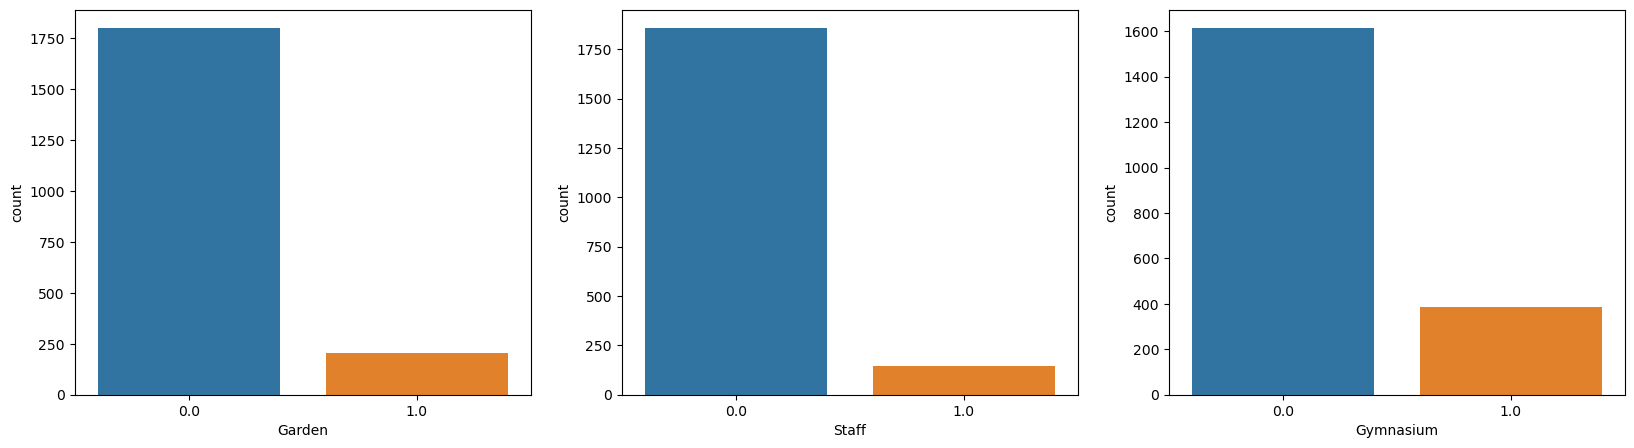

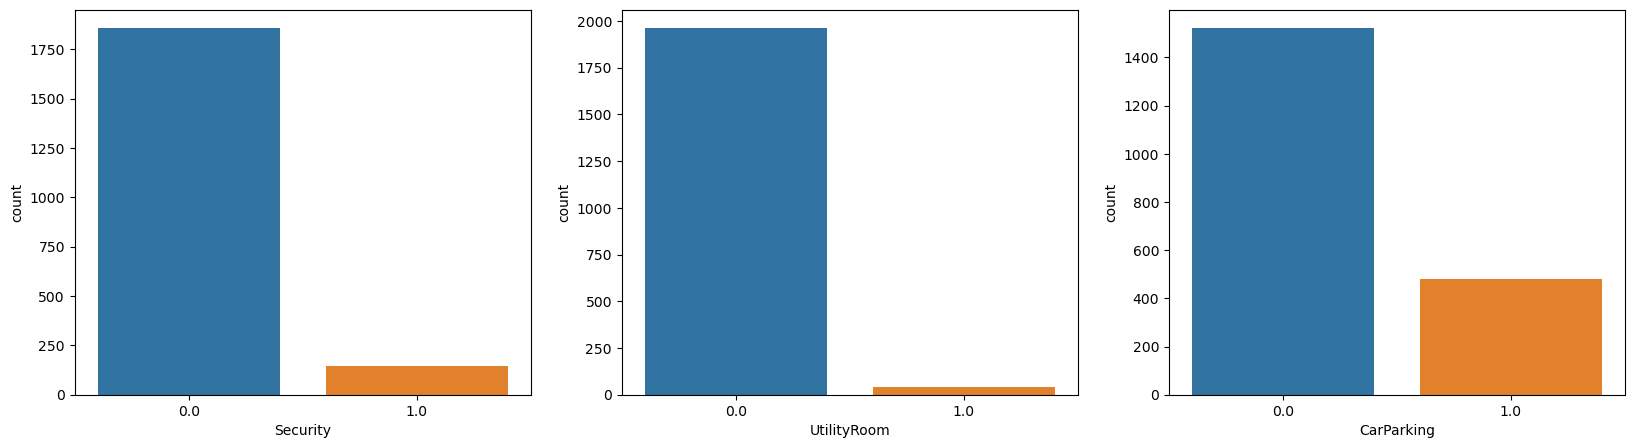

In [62]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.countplot(x=delhi["Garden"], ax = axs[0])
sns.countplot(x=delhi["Staff"], ax = axs[1])
sns.countplot(x=delhi["Gymnasium"], ax = axs[2])
plt.show()
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.countplot(x=delhi["Security"], ax = axs[0])
sns.countplot(x=delhi["UtilityRoom"], ax = axs[1])
sns.countplot(x=delhi["CarParking"], ax = axs[2])
plt.show()

In [63]:
#Converting String values to numerical and printing unique values for form data entry
loc = delhi["Location"]
le_location=LabelEncoder()
delhi["Location"]=le_location.fit_transform(delhi["Location"])
print("Max Area: ",max(delhi["Area"]))
print("Min Area: ",min(delhi["Area"]))
print("\nEncoded Location values: \n", delhi["Location"].unique())
print("\nLocations: \n", loc.unique())
print("\nBedrooms: \n",delhi["Bedrooms"].unique())
delhi

Max Area:  6400
Min Area:  200

Encoded Location values: 
 [ 55  96  53  11  80  79  78  71  36  73  56  70  57  98  82  38  59  20
  64  61   3  84  97  91  85  81  90  13  68  34  52  31   5  88   2  27
  58  33  17  22  77   9  76   7   6  14  83  41  43  63  65  21  44  40
  50   4  74  62  87  72  47  75  46  45 102   0  69  29  95  60  92  93
  86  19  23  16  30  49  15  51  66 100   8  37  32 101  54  24  99   1
  67  12  28  10  48  42  26  89  18  94  25  35  39]

Locations: 
 ['Sector 10 Dwarka' 'Uttam Nagar' 'Sarita Vihar' 'Dwarka Mor'
 'Sector 7 Dwarka' 'Sector 6 Dwarka' 'Sector 5 Dwarka' 'Sector 23 Rohini'
 'Mayur Vihar II' 'Sector 24 Rohini' 'Sector 11 Dwarka' 'Sector 23 Dwarka'
 'Sector 12 Dwarka' 'West End' 'Sector 9 Rohini' 'Mundka'
 'Sector 13 Rohini' 'Jamia Nagar' 'Sector 19 Dwarka' 'Sector 17 Dwarka'
 'Bindapur' 'Sector-18 Dwarka' 'Vasant Kunj' 'Shastri Nagar'
 'Sector-8 Rohini' 'Sector 9 Dwarka' 'Shanti Park Dwarka' 'Govindpuri'
 'Sector 22 Dwarka' 'Matiala' 'Sake

,Price,Area,Location,Bedrooms,Resale,Staff,Gymnasium,SwimmingPool,Garden,RainWaterHarvesting,...,CarParking,StaffQuarter,UtilityRoom,Playarea,Lift,BED,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,55,2,1,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6000000,1000,96,3,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15000000,1350,53,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2500000,435,96,2,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5800000,900,11,3,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,9000000,1200,41,2,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,12000000,1350,43,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,16000000,1963,9,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,11600000,1050,21,2,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
x=delhi.drop("Price",axis=1,inplace=False)
print(x.columns)
x=x.values
y=(delhi["Price"]).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lgr=LinearRegression(fit_intercept=True)
model_1=lgr.fit(x_train,y_train)

Index(['Area', 'Location', 'Bedrooms', 'Resale', 'Staff', 'Gymnasium',
       'SwimmingPool', 'Garden', 'RainWaterHarvesting', 'IndoorGames',
       'Intercom', 'Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'UtilityRoom', 'Playarea', 'Lift', 'BED', 'DiningTable', 'Sofa',
       'Wardrobe', 'Refrigerator'],
      dtype='object')


In [65]:
print(model_1.score(x_test,y_test))

0.8191210435977185


In [66]:
import pickle

In [67]:
pickle.dump(model_1, open("delhi_house.pkl", 'wb'))

In [68]:
#Loading the model and testing it
model_temp = pickle.load(open("delhi_house.pkl", 'rb'))
model_temp.predict(np.array([[2200, 34, 5, 1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]))

array([18127115.1990209])